## The Sugarscape.

The "Sugarscape" is a landscape (in the form of a lattice) where **sugar grows in each cell**.

The sugar provides energy and wealth.

**Agents explore the landscape** and, while doing it, harvest the sugar. 

- Each round, each agent move once. They move sequentially. Each round, the order in which the agent move is random.

- Two agents can't share the same cell: if an agent can't move on a free cell within its range, it remains in the cell it occupies.

- Each agent pays a metabilic cost to remain alive and move on the sugarscape. When their energy (that corresponds to their sugar level) falls below zero then they die of starvation.

At the end of each round, the **landscape regrowth the sugar** according to the growth rule $G_{\rm g}$.

In our implementation we also combine agents genetics randomly after a certain amount of time. In order to analyze which traits are better suited for survival. 

### Features of the Sugarscape.

We start from the classical implementation: 

- squared lattice $N \times N$

- sugar full capacity of each cell: from 0 to 4

- landscape shaped like two sugar-hills

- rule $G_{\infty}$: at the end of each round, the sugar regrowth instantly to the maximum capacity of each cell.


### Agents on the Sugarscape.

Agents on sugarsape have the following features:

- vision: $v$ (uniform distribution $\in \{1, 2, ..., 6 \}$)
- sugar: $s$ (uniform distribution $\in \{5, 6, ... 25 \}$)
- metabolism: $m$ (uniform distribution $\in \{1, 2, 3, 4 \}$)

The vision determines the motion range.

The sugar is a reservoir of energy.

The metabolism represents the enegy each agents demands per round to survive. 



In [1]:
import numpy as np
import pandas as pd
from random import sample

In [2]:
def move_agents(SuSca, agents, N):
    """
    Function to move the agents on the sugarscape using a pandas DataFrame.
    Implements one round where all agents move once, ensuring no two agents occupy the same cell.
    
    Parameters
    ==========
    SuSca : 2D numpy array representing the sugarscape (sugar levels at each position).
    agents : pandas DataFrame containing agent attributes and positions.
    N : Size of the sugarscape grid (NxN).
    max_vision : Maximum vision range for agents.

    Returns
    =======
    Updated sugarscape grid and agents DataFrame.
    """
    Nx, Ny = SuSca.shape
    SuSca = SuSca.copy()
    
    # Shuffle agent order to randomize movement
    agents = agents.sample(frac=1).reset_index(drop=True)
    
    # Create a set of occupied cells (x, y)
    occupied_cells = set(zip(agents["x"], agents["y"]))
    
    for i, agent in agents.iterrows():
        # Get agent's properties
        x, y = int(agent["x"]), int(agent["y"])   # position of the agent 
        vision = int(agent["vision"])  # Scale vision to an integer
        sugar = agent["sugar"]
        metabolism = agent["metabolism"]
        lifespan = agent['lifespan']
        
        # Determine visible cells within vision range
        visible_positions = []
        for dx in range(-vision, vision + 1):
            for dy in range(-vision, vision + 1):
                if abs(dx) + abs(dy) <= vision:  # Manhattan distance
                    new_x = int((x + dx) % Nx)  # modulo wraps boundaries
                    new_y = int((y + dy) % Ny)
                    if (new_x, new_y) not in occupied_cells:  # Skip occupied cells
                        visible_positions.append((new_x, new_y))
        
        if not visible_positions:
            # No valid moves; this agent is stuck
            continue
        
        # Find the cell with the highest sugar within vision
        # Here it might be possible to add a new lambda key, representing radiation for example. 
        best_cell = max(
            visible_positions,
            key=lambda pos: SuSca[pos[0], pos[1]]
        )
        
        # Move agent to the best cell
        new_x, new_y = best_cell
        agents.at[i, "x"] = new_x
        agents.at[i, "y"] = new_y
        
        # Update occupied cells safely
        if (x, y) in occupied_cells:
            occupied_cells.remove((x, y))  # Move from the old cell
        occupied_cells.add((new_x, new_y))  # Mark the new cell as occupied
        
        
        # Collect sugar from the new cell
        agents.at[i, "sugar"] += SuSca[new_x, new_y]
        SuSca[new_x, new_y] = 0  # Deplete the cell's sugar
        
        # Pay the metabolic cost
        agents.at[i, "sugar"] -= metabolism

        # One iteration cost 1 year of lifespan
        agents.at[i,'age'] += 1




    # Remove agents with sugar <= 0 (they "die"), then reset the index of the DataFrame
    agents = agents[agents["sugar"] > 0].reset_index(drop=True)

    # Remove agents with age <= 0 (they "die"), then reset the index of the DataFrame
    agents = agents[agents["age"] > agents['lifespan']].reset_index(drop=True)
    
    return SuSca, agents


In [3]:
import numpy as np
# Test to understand the lamda function
matrix = np.random.randint(0, 6, size=(5, 5))
print(matrix)
visible_places = [(1, 0), (2, 1), (3, 2), (4, 3),
    (0, 1), (2, 3), (3, 4), (1, 2) ]


besta_cellen = max(
            visible_places,
            key=lambda pos: matrix[pos[0], pos[1]]
        )

print(besta_cellen)
# choosing only one cell even if there is more with the same value, OK!

[[1 2 2 5 0]
 [5 4 5 1 1]
 [0 2 0 4 1]
 [0 5 4 3 0]
 [4 1 3 3 0]]
(1, 0)


Initialize the sugarscape in the "classical" way.

In [4]:


### Function to initialize the sugarscape with integer values ###
# def initialize_sugarscape(N):
#     """
#     Function to generate the "classical" sugarscape.
    
#     Parameters
#     ==========
#     N : Side of the sugarscape lattice.
#     """
    
#     # Initialize SuSca with integer values
#     SuSca = np.zeros([N, N], dtype=int)  # Ensure the matrix is integer
    
#     # Create grid of coordinates
#     X, Y = np.meshgrid(np.arange(N), np.arange(N))
    
#     # Define the center locations for the sugar sources
#     x_centers = np.array([N / 4, 3 * N / 4])
#     y_centers = np.array([N / 4, 3 * N / 4])

#     # Define the radius levels and sugar levels
#     r_levels = np.array([4, 3, 2, 1]) / 4 * (np.sqrt(2) / 4) * N
#     s_levels = np.array([1, 2, 3, 4])
    
#     # Loop through the centers and assign sugar values
#     for k in range(np.size(x_centers)):
#         # Calculate distance from the center to each point on the grid
#         d = np.sqrt((X - x_centers[k]) ** 2 + (Y - y_centers[k]) ** 2)
        
#         # Loop through the sugar levels
#         for i in range(np.size(s_levels)):
#             # Determine the region within the radius and assign sugar levels
#             region = np.where(d <= r_levels[i])
#             SuSca[region[0], region[1]] = s_levels[i]
    
#     return SuSca

#print(initialize_sugarscape(10))




In [5]:
def initialize_sugarscape_gaussian(N, spot_positions, spot_widths, max_sugar):
    """
    Function to generate a sugarscape with Gaussian-distributed sugar levels.
    
    Parameters
    ==========
    N : int
        Size of the sugarscape lattice (NxN).
    spot_positions : array-like
        List of (x, y) positions where sugar "hotspots" are centered.
    spot_widths : array-like
        List of standard deviations (sigma) for the Gaussian spread of each hotspot.
    max_sugar : float
        Maximum sugar value to normalize the distribution.
        
    Returns
    =======
    SuSca : ndarray
        2D array of sugar levels.
    """
    # Initialize the sugarscape grid
    SuSca = np.zeros((N, N), dtype=float)

    # Create a grid of coordinates
    X, Y = np.meshgrid(np.arange(N), np.arange(N))

    # Define the Gaussian function
    def gauss(r, sigma):
        return np.exp(-r**2 / (2 * sigma**2))

    # defining threshold for low sugar cell
    threshold = 0.1 * max_sugar
    


    # Loop over all sugar hotspots
    for i, (x_center, y_center) in enumerate(spot_positions):
        dx = (X - x_center).astype(np.float64)
        dy = (Y - y_center).astype(np.float64)
        
        # Apply periodic boundary conditions
        dx -= np.round(dx / N) * N
        dy -= np.round(dy / N) * N

        # Compute the radial distance
        r = np.sqrt(dx**2 + dy**2)

        # Add Gaussian sugar levels to the grid
        SuSca += gauss(r, spot_widths[i])

    # Normalize sugar levels to the max_sugar value
    SuSca *= max_sugar / np.max(SuSca)
    
    return SuSca



In [6]:
def regenerate_hotspots(SuSca, N, num_hotspots, max_sugar, peak_value=5.0, sigma=3.0):
    """
    Function to regrow sugar in the Sugarscape using gradient-based hotspots.

    Parameters
    ==========
    SuSca : ndarray
        Current sugar levels in the Sugarscape.
    N : int
        Size of the Sugarscape (NxN).
    num_hotspots : int
        Number of new sugar hotspots to create.
    max_sugar : float
        Maximum possible sugar value per cell.
    peak_value : float
        Maximum sugar value at the hotspot center.
    sigma : float
        Standard deviation controlling the spread of the sugar gradient.

    Returns
    =======
    SuSca : ndarray
        Updated sugar levels with new hotspots.
    """
    # Create a grid of coordinates
    X, Y = np.meshgrid(np.arange(N), np.arange(N))

    # Define the Gaussian function
    def gauss(r, sigma):
        return np.exp(-r**2 / (2 * sigma**2))

    # Add new sugar gradients to the Sugarscape
    for _ in range(num_hotspots):
        # Randomly select a new hotspot center
        x_center, y_center = np.random.randint(0, N, size=2)

        # Calculate distances with periodic boundary conditions
        dx = (X - x_center).astype(np.float64)
        dy = (Y - y_center).astype(np.float64)
        dx -= np.round(dx / N) * N
        dy -= np.round(dy / N) * N
        r = np.sqrt(dx**2 + dy**2)

        # Add a new sugar gradient to the Sugarscape
        new_sugar = peak_value * gauss(r, sigma)
        SuSca += new_sugar

    # Clip sugar levels to ensure they don't exceed max_sugar
    SuSca = np.clip(SuSca, 0, max_sugar)
    
    return SuSca


Defining GA-Logic. All pretty self explanatory. 


In [7]:
def calculate_fitness(agent): 
    # A simple fitness function
    # What do we want to have as fitness? 
    fitness =agent['sugar'] * agent['metabolism'] * agent['vision']
    return fitness

def select_parents(agents, num_parents):
    parents = []
    for _ in range(num_parents):
        selected = agents.sample(3)  # Select 3 random agents for the tournament
        parent = selected.loc[selected['fitness'].idxmax()]  # Select the best one
        parents.append(parent)
    return pd.DataFrame(parents)

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, 2)  # Randomly choose a point (since there are 3 traits)
    
    child1 = parent1.copy()
    child2 = parent2.copy()

    # Swap the genes after the crossover point
    # if crossover_point == 0:
    #     child1['sugar'], child2['sugar'] = parent2['sugar'], parent1['sugar']
    if crossover_point == 0:
        child1['metabolism'], child2['metabolism'] = parent2['metabolism'], parent1['metabolism']
    elif crossover_point == 1:
        child1['vision'], child2['vision'] = parent2['vision'], parent1['vision']
    
    return child1, child2

def mutate(agent, mutation_rate=0.01):
    if np.random.rand() < mutation_rate:
        # Randomly choose one attribute to mutate
        attribute_to_mutate = np.random.choice(['metabolism', 'vision'])
        agent[attribute_to_mutate] = np.random.randint(1, 5)
    return agent


def replace_population(agents, new_agents):
    return pd.concat([agents, new_agents]).reset_index(drop=True)

In [8]:
print(np.random.randint(0,2))

0


Function to convert a 2 dimensional numpy array into a RGB image.

In [9]:
def convert2RBG(game_outcome, RGB0, RGB1):
    """
    Function to convert the 2 dimensional numpy array into a RGB image.
    
    Parameters
    ==========
    game_outcome : Outcome of the prisoner's dilemma.
    RGB0 : Components R, G, B of the chosen color shade for minimum I_profile.
    RGB1 : Components R, G, B of the chosen color shade for maximum I_profile.
    """
    
    [n_rows, n_cols] = game_outcome.shape
    
    I_RGB = np.zeros([n_rows, n_cols, 3])
    
    # Set I_profile between 0 and 1
    game_outcome -= np.amin(game_outcome)    
    game_outcome /= np.amax(game_outcome)  
    
    for c in range(3):
        I_RGB[:, :, c] = game_outcome * RGB1[c] + (1 - game_outcome) * RGB0[c]

    return I_RGB

Initialize the sugarscape


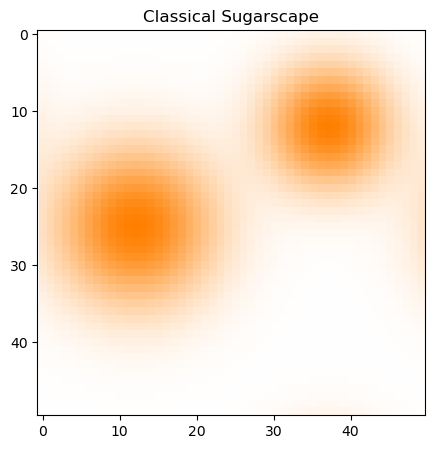

In [10]:
from matplotlib import pyplot as plt

N = 50  # Side of the sugarscape.
spot_positions = [(N //4, N // 2), (3 * N // 4, 1 * N // 4), ]  # Center of the sugar spots.
spot_widths = [N / 7, N / 9]  # Width of the sugar spots.
max_sugar = 10  # Maximum sugar level.


SuSca = initialize_sugarscape_gaussian(N, spot_positions, spot_widths, max_sugar)

# Create the image of the game outcome.
RGB1 = [1.0, 0.5, 0.0]  # Orange. Color for high values.
RGB0 = [1.0, 1.0, 1.0]  # White. Color for low values.
SuSca_RGB = convert2RBG(SuSca, RGB0, RGB1)

# Plot the Sugarscape.
plt.figure(figsize=(5, 5))
plt.imshow(SuSca_RGB)  # Plot Sugarscape profile.
# Plot the reference points.
plt.title('Classical Sugarscape')
plt.axis('equal')
plt.show()       


In [11]:
from random import sample

N = 50  # Size of the sugarscape with the agents.
A = 1000  # Number of agents on the sugarscape.

x_positions = np.random.randint(0, N, A)  # Random X positions
y_positions = np.random.randint(0, N, A)  # Random Y positions

# Create the agents with random integers between 1 and 5
agents = pd.DataFrame({
    "sugar": np.random.randint(1, 6, A),        # Random integers between 1 and 5 for sugar
    "metabolism": np.random.randint(1, 6, A),   # Random integers between 1 and 5 for metabolism
    "vision": np.random.randint(1, 6, A),       # Random integers between 1 and 5 for vision
    "fitness": np.zeros(A),                     # Initialize fitness to 0
    "age" : np.zeros(A),                        # Initialize age to 0
    "lifespan": np.random.randint(20, 50, A),   # Initialize lifespan randomly
    "x": x_positions,                           # X-coordinate of agent
    "y": y_positions                            # Y-coordinate of agent
})


print(agents)


     sugar  metabolism  vision  fitness  age  lifespan   x   y
0        4           3       1      0.0  0.0        32  25  42
1        3           4       4      0.0  0.0        48  22  44
2        2           3       2      0.0  0.0        21  11   8
3        4           3       3      0.0  0.0        37  16  17
4        4           4       4      0.0  0.0        36  20  27
..     ...         ...     ...      ...  ...       ...  ..  ..
995      5           2       4      0.0  0.0        30  22  31
996      3           2       4      0.0  0.0        20   8  49
997      4           5       4      0.0  0.0        38  41   8
998      2           5       1      0.0  0.0        34   8   7
999      3           4       4      0.0  0.0        46  48  38

[1000 rows x 8 columns]


In [12]:
import time
from tkinter import Tk
from tkinter import Canvas
import numpy as np

r0 = 0.25
N_skip = 1

# Visualize status every N_skip steps. 
window_size = 600

# Define the RGB colors for white and orange
RGB1 = [1.0, 0.5, 0.0]  # Orange for high values.
RGB0 = [1.0, 1.0, 1.0]  # White for low values.

def convert2RGB(game_outcome, RGB0, RGB1):
    """
    Function to convert the 2-dimensional numpy array into an RGB image.
    
    Parameters
    ==========
    game_outcome : Outcome of the sugar distribution.
    RGB0 : Components R, G, B of the chosen color shade for minimum sugar.
    RGB1 : Components R, G, B of the chosen color shade for maximum sugar.
    """
    # Get the dimensions of the game outcome
    [n_rows, n_cols] = game_outcome.shape
    
    # Initialize the RGB image
    I_RGB = np.zeros([n_rows, n_cols, 3])
    
    # Normalize the sugar levels to be between 0 and 1
    game_outcome -= np.amin(game_outcome)    
    game_outcome /= np.amax(game_outcome)  
    
    # Map the normalized sugar levels to RGB
    for c in range(3):
        I_RGB[:, :, c] = game_outcome * RGB1[c] + (1 - game_outcome) * RGB0[c]

    return I_RGB

# Normalize sugar array
normalized_sugar = SuSca / max_sugar  # Normalize to [0, 1]

# Convert the sugar array to RGB colors
color_image = convert2RGB(normalized_sugar, RGB0, RGB1)

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
canvas.place(x=10, y=10, height=window_size, width=window_size)

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.

MAX_STEP = 150
step = 0 

# Lists to store data from every step
iterations = np.arange(1,MAX_STEP+1,1)
num_agents = []
avg_metabolism = []
avg_vision = []
avg_age = []
avg_sugar = []

while running:
    nSuSca, nA = move_agents(SuSca, agents, N)  # Move the agents on the sugarscape.

    # Update animation frame.
    if step % N_skip == 0:
        canvas.delete('all')
        SU_cells = []
        
        # Use the converted RGB image to draw the cells
        for i in range(N):
            for j in range(N):
                # Get the color from the RGB image
                cell_color = color_image[i, j]
                hex_color = f'#{int(cell_color[0]*255):02x}{int(cell_color[1]*255):02x}{int(cell_color[2]*255):02x}'
                
                SU_cells.append(
                    canvas.create_rectangle(
                        i / N * window_size, 
                        j / N * window_size,
                        (i + 1) / N * window_size,
                        (j + 1) / N * window_size, 
                        outline='', 
                        fill=hex_color,
                    )
                )

        # Update the agents
        Agents_circ = []
        for _, agent in agents.iterrows():  # Iterating through each row in the DataFrame
            x = agent["x"]  # X-coordinate of the agent
            y = agent["y"]  # Y-coordinate of the agent

            # Drawing the agent as a circle
            Agents_circ.append(
                canvas.create_oval(
                    (x + 0.5 - r0) / N * window_size,  # Top-left x-coordinate
                    (y + 0.5 - r0) / N * window_size,  # Top-left y-coordinate
                    (x + 0.5 + r0) / N * window_size,  # Bottom-right x-coordinate
                    (y + 0.5 + r0) / N * window_size,  # Bottom-right y-coordinate
                    outline='', 
                    fill='#000000',
                )
            )

        tk.title(f'Iteration {step+1}')
        tk.update_idletasks()
        tk.update()
        time.sleep(1)  # Increase to slow down the simulation.

    agents['fitness'] = agents.apply(calculate_fitness, axis=1)
    agents['age'] += 1
    agents = agents[agents['age'] < agents['lifespan']]
    
    print(agents)


    agents = nA
    step += 1 
    
    # Save data for plots
    num_agents.append(len(agents))  # Antalet agenter (kan förändras under simuleringen)
    avg_metabolism.append(agents["metabolism"].mean())  # Medelvärde av metabolism
    avg_vision.append(agents["vision"].mean())  # Medelvärde av vision
    avg_age.append(agents["age"].mean())
    avg_sugar.append(agents["sugar"].mean())

    # after some steps, apply the GA logic
    if step >30:
        parents = select_parents(agents, 10)
        new_agents = []
        for i in range(0, len(parents), 2):
            parent1 = parents.iloc[i]
            parent2 = parents.iloc[i + 1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_agents.append(child1)
            new_agents.append(child2)
        agents = replace_population(agents, pd.DataFrame(new_agents))  # Keeping the old agents and adding the new ones to the population --> Population size grows each round
        print(agents)
    
    # Periodically regenerate sugar hotspots
    if step % 20 == 0:  # Regenerate every 20 steps
        SuSca = regenerate_hotspots(SuSca, N=50, num_hotspots=3, max_sugar=10, peak_value=5, sigma=4)

    if len(agents) < 15:
        running = False
    if step == MAX_STEP:
        running = False 

        

#tk.update_idletasks()
#tk.update()
#tk.mainloop()  # Release animation handle (close window to finish).


/var/folders/g7/7d8l4vfx5cg1cd6cz4d3ml_w0000gn/T/ipykernel_58798/3606139982.py:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.812325041265153' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  agents.at[i, "sugar"] += SuSca[new_x, new_y]


     sugar  metabolism  vision  fitness  age  lifespan   x   y
0        4           3       1     12.0  1.0        32  25  42
1        3           4       4     48.0  1.0        48  22  44
2        2           3       2     12.0  1.0        21  11   8
3        4           3       3     36.0  1.0        37  16  17
4        4           4       4     64.0  1.0        36  20  27
..     ...         ...     ...      ...  ...       ...  ..  ..
995      5           2       4     40.0  1.0        30  22  31
996      3           2       4     24.0  1.0        20   8  49
997      4           5       4     80.0  1.0        38  41   8
998      2           5       1     10.0  1.0        34   8   7
999      3           4       4     48.0  1.0        46  48  38

[1000 rows x 8 columns]


1


ValueError: x and y must have same first dimension, but have shapes (150,) and (1,)

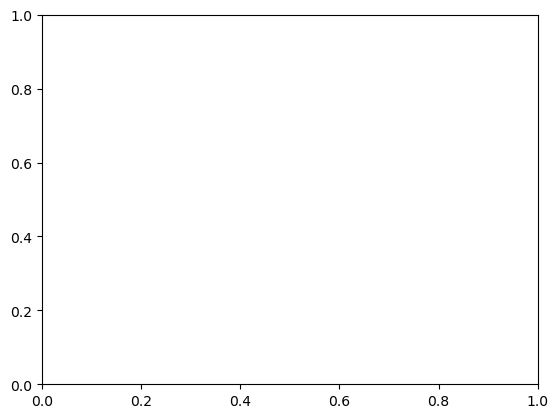

In [13]:
import matplotlib.pyplot as plt

# Save results in a pandas dataframe
abilities_results = pd.DataFrame({
    'metabolism': avg_metabolism,
    'vision': avg_vision,
    'age': avg_age,
    'sugar': avg_sugar
})  
colors = ['r', 'g','teal','orange','darkgreen']

print(len(abilities_results))

plt.figure()
plt.plot(iterations, num_agents, color= 'teal')
plt.title(f'Number of agents during {MAX_STEP} iterations')
plt.xlabel('Iterations')
plt.ylabel('Number of agents')
plt.show()

plt.figure()
for ability in range(abilities_results.shape[1]):
    colomn_name = abilities_results.columns[ability]
    plt.plot(iterations,abilities_results[colomn_name], color= colors[ability])
    plt.title(f'Average {colomn_name} during {MAX_STEP} iterations') 
    plt.xlabel('Iterations')
    plt.ylabel(f'Average {colomn_name}')
    plt.show()




In [ ]:
iterations = np.arange(1,MAX_STEP,1)
print(iterations)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [ ]:
# import time
# from tkinter import Tk, Canvas
# import numpy as np
# import pandas as pd  # Assuming agents are stored in a DataFrame

# # Parameters
# r0 = 0.25
# N_skip = 1
# window_size = 600
# RGB1 = [1.0, 0.5, 0.0]  # Orange for high sugar
# RGB0 = [1.0, 1.0, 1.0]  # White for low sugar

# def convert2RGB(game_outcome, RGB0, RGB1):
#     """
#     Convert the sugar levels into an RGB color map dynamically.
#     """
#     game_outcome -= np.amin(game_outcome)
#     game_outcome /= np.amax(game_outcome)
#     I_RGB = np.zeros((*game_outcome.shape, 3))
#     for c in range(3):
#         I_RGB[:, :, c] = game_outcome * RGB1[c] + (1 - game_outcome) * RGB0[c]
#     return I_RGB

# # Function to dynamically update the canvas
# def update_canvas(canvas, SuSca, agents, SU_cells, Agents_circ, N, window_size):
#     """
#     Update the canvas dynamically for Sugarscape and agents.
#     """
#     # Normalize sugar levels for RGB mapping
#     normalized_sugar = SuSca / np.max(SuSca)
#     color_image = convert2RGB(normalized_sugar, RGB0, RGB1)

#     # Clear old sugar cells
#     for cell in SU_cells:
#         canvas.delete(cell)
#     SU_cells.clear()

#     # Update Sugarscape
#     for i in range(N):
#         for j in range(N):
#             if SuSca[i, j] > 0:
#                 cell_color = color_image[i, j]
#                 hex_color = f'#{int(cell_color[0] * 255):02x}{int(cell_color[1] * 255):02x}{int(cell_color[2] * 255):02x}'
#                 SU_cells.append(
#                     canvas.create_rectangle(
#                         i / N * window_size,
#                         j / N * window_size,
#                         (i + 1) / N * window_size,
#                         (j + 1) / N * window_size,
#                         outline='',
#                         fill=hex_color
#                     )
#                 )

#     # Clear old agent circles
#     for circ in Agents_circ:
#         canvas.delete(circ)
#     Agents_circ.clear()

#     # Update agents
#     for _, agent in agents.iterrows():
#         x, y = agent["x"], agent["y"]
#         Agents_circ.append(
#             canvas.create_oval(
#                 (x + 0.5 - r0) / N * window_size,
#                 (y + 0.5 - r0) / N * window_size,
#                 (x + 0.5 + r0) / N * window_size,
#                 (y + 0.5 + r0) / N * window_size,
#                 outline='',
#                 fill='#000000'
#             )
#         )

# # Initialize Tkinter
# tk = Tk()
# tk.geometry(f'{window_size + 20}x{window_size + 20}')
# tk.configure(background='#000000')

# canvas = Canvas(tk, background='#ECECEC')
# canvas.place(x=10, y=10, height=window_size, width=window_size)

# # Initial state
# step = 0
# running = True
# SU_cells = []
# Agents_circ = []

# # Stop loop on Escape key
# def stop_loop(event):
#     global running
#     running = False
# tk.bind("<Escape>", stop_loop)

# # Animation loop
# while running:
#     # Update Sugarscape and agents
#     nSuSca, nA = move_agents(SuSca, agents, N)

#     if step % N_skip == 0:
#         update_canvas(canvas, SuSca, agents, SU_cells, Agents_circ, N, window_size)
#         tk.title(f'Iteration {step}')
#         tk.update_idletasks()
#         tk.update()
#         time.sleep(0.1)  # Adjust this for speed

#     # Update agents with fitness
#     agents['fitness'] = agents.apply(calculate_fitness, axis=1)

#     # Apply genetic algorithm after some steps
#     if step > 30:
#         parents = select_parents(agents, 10)
#         new_agents = []
#         for i in range(0, len(parents), 2):
#             parent1 = parents.iloc[i]
#             parent2 = parents.iloc[i + 1]
#             child1, child2 = crossover(parent1, parent2)
#             child1 = mutate(child1)
#             child2 = mutate(child2)
#             new_agents.extend([child1, child2])
#         agents = replace_population(agents, pd.DataFrame(new_agents))

#     # Regenerate sugar hotspots periodically
#     if step % 20 == 0:
#         SuSca = regenerate_hotspots(SuSca, N=50, num_hotspots=3, max_sugar=10, peak_value=5, sigma=4)

#     agents = nA
#     step += 1

# # Close Tkinter when finished
# tk.update_idletasks()
# tk.update()
# tk.mainloop()


Now let's try without animation.

In [ ]:
# from random import sample

# N = 50  # Size of the sugarscape with the agents.
# A = 400  # Number of agents on the sugarscape.

# # Initial values. Chosen from the following flat distributions.
# possible_m = np.arange(4) + 1  # Metabolic rate.
# possible_v = np.arange(6) + 1  # Vision.
# possible_s = np.arange(21) + 5  # Sugar.

# # Agents initialized. 
# M = np.random.randint(np.size(possible_m), size=A) + 1
# V = np.random.randint(np.size(possible_v), size=A) + 1
# S = np.random.randint(np.size(possible_s), size=A) + 5

# M0 = M.copy()
# S0 = S.copy()
# V0 = V.copy()

# # Define agents position. 
# L = np.array(sample(range(N * N), A)).astype(int) 
# x = L % N
# y = ((L - x) / N).astype(int) 
# # This way each agent occupy a different cell.

# SuSca = initialize_sugarscape(N)

# # Number of agents
# num_agents = 400

# # Create a DataFrame with random values for each attribute
# agents = pd.DataFrame({
#     "sugar": np.random.uniform(0, 1, num_agents),       # Random sugar values
#     "metabolism": np.random.uniform(0, 1, num_agents), # Random metabolism values
#     "vision": np.random.uniform(0, 1, num_agents),     # Random vision values
#     "fitness": np.zeros(num_agents)                    # Initialize fitness to 0
# })


In [ ]:
# from IPython.display import clear_output
# from matplotlib import pyplot as plt
    
# # Create the image of the game outcome.
# RGB1 = [1.0, 0.5, 0.0]  # Orange. Color for high values.
# RGB0 = [1.0, 1.0, 1.0]  # White. Color for low values.

# MAX_STEP = 1001
# N_skip = 200
# step = 0

# N_alive_agents = np.zeros(MAX_STEP)


# running = True  # Flag to control the loop.
# while running:

#     N_alive_agents[step] = A

#     nSuSca, nA, nV, nS, nM, nx, ny = move_agents(SuSca, A, V, S, M, x, y)

#     if step % N_skip == 0:   
#         SuSca_RGB = convert2RBG(nSuSca, RGB0, RGB1)

#         plt.figure(figsize=(5, 5))
#         plt.imshow(SuSca_RGB)
#         plt.plot(ny, nx, '.', color='k')
#         plt.show()
    
    
#     A = nA
#     V = nV.copy()
#     S = nS.copy()
#     M = nM.copy()
#     x = nx.copy()
#     y = ny.copy()
#     step += 1
    
#     if step >= MAX_STEP:
#         running = False

        
# # Final Values
# M1 = M.copy()
# S1 = S.copy()
# V1 = V.copy()



Compare histograms:

In [ ]:
print(A)

1000


#### Metabolism

In [ ]:
# # Metabolism: initial and final distribution.
# m_bins = possible_m
# m_bins_edges = np.arange(np.amin(possible_m) - 0.5, np.amax(possible_m) + 0.6)
# m_ini_h, m_ini_e = np.histogram(M0, bins=m_bins_edges)
# m_fin_h, m_fin_e = np.histogram(M1, bins=m_bins_edges)


# plt.figure(figsize=(10, 5))
# plt.bar(m_bins, m_ini_h, width=0.8, edgecolor='k', label='initial')
# plt.bar(m_bins, m_fin_h, width=0.4, edgecolor='k', label='final')
# plt.legend()
# plt.xlabel('m')
# plt.title('metabolism')
# plt.show()





#### Vision

In [ ]:
# # Vision: initial and final distribution.
# v_bins = possible_v
# v_bins_edges = np.arange(np.amin(possible_v) - 0.5, np.amax(possible_v) + 0.6)
# v_ini_h, v_ini_e = np.histogram(V0, bins=v_bins_edges)
# v_fin_h, v_fin_e = np.histogram(V1, bins=v_bins_edges)


# plt.figure(figsize=(10, 5))
# plt.bar(v_bins, v_ini_h, width=0.8, edgecolor='k', label='initial')
# plt.bar(v_bins, v_fin_h, width=0.4, edgecolor='k', label='final')
# plt.legend()
# plt.xlabel('v')
# plt.title('vision')
# plt.show()


#### Sugar

In [ ]:
# # Sugar: initial and final distribution.
# s_bins_i = possible_s
# s_bins_edges_i = np.arange(np.amin(possible_s) - 0.5, np.amax(possible_s) + 0.6)
# s_ini_h, s_ini_e = np.histogram(S0, bins=s_bins_edges_i)

# plt.figure(figsize=(10, 5))
# plt.bar(s_bins_i, s_ini_h, width=0.8, edgecolor='k', label='initial')
# plt.legend()
# plt.xlabel('s')
# plt.title('sugar')
# plt.show()




### Lorenz curve and Gini coefficient.

Measure of equality in wealth / resources distribution 

In [ ]:
# def Lorenz_curve(s):
#     """
#     Function to generate the Lorenz curve from a sequence of data.
    
#     Parameters
#     ==========
#     s : Sugar of each agent.
#     """
    
#     N = np.size(s)
    
#     population_fraction = np.arange(N) / N
    
#     s_sorted = np.sort(s)
    
#     cumulative_s_fraction = np.cumsum(s_sorted) / np.sum(s_sorted)
    
    
#     return cumulative_s_fraction, population_fraction

In [ ]:
# L0, F0 = Lorenz_curve(S0)


# plt.figure(figsize=(5, 5))
# plt.plot(F0, L0, '.-', label='initial')
# plt.plot([0, 1], [0, 1], '--', color='k', label='equality')
# plt.legend()
# plt.xlabel('F')
# plt.ylabel('L')
# plt.title('sugar')
# plt.show()


